<a href="https://colab.research.google.com/github/Dhafanur25/AI_ArrhythmiaChecker/blob/main/KelompokMKD_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modul yang dibutuhkan
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt # modul untuk membuat diagram batang

# **Read Data**

In [ ]:
# masukkan URL ke variable 'file_url'
# Data tersebut merupakan data 'arrhythmia.data'
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'

# baca dengan pd.read_csv() dengan argumen header=None(menandakan tidak ada baris header) dan na_values='?'(semua nilai '?' diubah menjadi NaN)
dataf = pd.read_csv(file_url, header=None, na_values='?')

In [ ]:
# Rename semua column sesuai 'arrhythmia.names'
dataf.set_axis(["Age", "Sex", "Height", "Weight", "QRS Duration", "P-R Interval", "Q-T Interval", "T Interval", "P Interval", "QRS Vector_A", "T Vector_A", "P Vector_A", "QRST Vector_A",
               "J Vector_A", "Heart Rate","Q Wave_W_DI", "R Wave_W_DI", "S Wave_W_DI", "R` Wave_W_DI", "S` Wave_W_DI", "Intrinsic_Deflect_DI", "R_R Wave DI", "D_D_R Wave DI", "R_P Wave DI",
               "D_D_P Wave DI", "R_T Wave DI", "D_D_T Wave DI","Q Wave_W_DII", "R Wave_W_DII", "S Wave_W_DII", "R` Wave_W_DII", "S` Wave_W_DII", "Intrinsic_Deflect_DII", "R_R Wave DII", "D_D_R Wave DII",
               "R_P Wave DII", "D_D_P Wave DII", "R_T Wave DII", "D_D_T Wave DII","Q Wave_W_DIII", "R Wave_W_DIII", "S Wave_W_DIII", "R` Wave_W_DIII", "S` Wave_W_DIII", "Intrinsic_Deflect_DIII",
               "R_R Wave DIII", "D_D_R Wave DIII", "R_P Wave DIII", "D_D_P Wave DIII", "R_T Wave DIII", "D_D_T Wave DIII","Q Wave_W_AVR", "R Wave_W_AVR", "S Wave_W_AVR", "R` Wave_W_AVR", "S` Wave_W_AVR",
               "Intrinsic_Deflect_AVR", "R_R Wave AVR", "D_D_R Wave AVR", "R_P Wave AVR", "D_D_P Wave AVR", "R_T Wave AVR", "D_D_T Wave AVR","Q Wave_W_AVL", "R Wave_W_AVL", "S Wave_W_AVL", "R` Wave_W_AVL",
               "S` Wave_W_AVL", "Intrinsic_Deflect_AVL", "R_R Wave AVL", "D_D_R Wave AVL", "R_P Wave AVL", "D_D_P Wave AVL", "R_T Wave AVL", "D_D_T Wave AVL","Q Wave_W_AVF", "R Wave_W_AVF", "S Wave_W_AVF",
               "R` Wave_W_AVF", "S` Wave_W_AVF", "Intrinsic_Deflect_AVF", "R_R Wave AVF", "D_D_R Wave AVF", "R_P Wave AVF", "D_D_P Wave AVF", "R_T Wave AVF", "D_D_T Wave AVF","Q Wave_W_V1", "R Wave_W_V1",
               "S Wave_W_V1", "R` Wave_W_V1", "S` Wave_W_V1", "Intrinsic_Deflect_V1", "R_R Wave V1", "D_D_R Wave V1", "R_P Wave V1", "D_D_P Wave V1", "R_T Wave V1", "D_D_T Wave V1","Q Wave_W_V2", "R Wave_W_V2",
               "S Wave_W_V2", "R` Wave_W_V2", "S` Wave_W_V2", "Intrinsic_Deflect_V2", "R_R Wave V2", "D_D_R Wave V2", "R_P Wave V2", "D_D_P Wave V2", "R_T Wave V2", "D_D_T Wave V2","Q Wave_W_V3", "R Wave_W_V3",
               "S Wave_W_V3", "R` Wave_W_V3", "S` Wave_W_V3", "Intrinsic_Deflect_V3", "R_R Wave V3", "D_D_R Wave V3", "R_P Wave V3", "D_D_P Wave V3", "R_T Wave V3", "D_D_T Wave V3","Q Wave_W_V4", "R Wave_W_V4",
               "S Wave_W_V4", "R` Wave_W_V4", "S` Wave_W_V4", "Intrinsic_Deflect_V4", "R_R Wave V4", "D_D_R Wave V4", "R_P Wave V4", "D_D_P Wave V4", "R_T Wave V4", "D_D_T Wave V4","Q Wave_W_V5", "R Wave_W_V5",
               "S Wave_W_V5", "R` Wave_W_V5", "S` Wave_W_V5", "Intrinsic_Deflect_V5", "R_R Wave V5", "D_D_R Wave V5", "R_P Wave V5", "D_D_P Wave V5", "R_T Wave V5", "D_D_T Wave V5","Q Wave_W_V6", "R Wave_W_V6",
               "S Wave_W_V6", "R` Wave_W_V6", "S` Wave_W_V6", "Intrinsic_Deflect_V6", "R_R Wave V6", "D_D_R Wave V6", "R_P Wave V6", "D_D_P Wave V6", "R_T Wave V6", "D_D_T Wave V6","JJ Wave_Amp_DI", "Q Wave_Amp_DI",
               "R Wave_Amp_DI", "S Wave_Amp_DI", "R` Wave_Amp_DI", "S` Wave_Amp_DI", "P Wave_Amp_DI", "T Wave_Amp_DI", "QRSA DI", "QRSTA DI","JJ Wave_Amp_DII", "Q Wave_Amp_DII", "R Wave_Amp_DII", "S Wave_Amp_DII",
               "R` Wave_Amp_DII", "S` Wave_Amp_DII", "P Wave_Amp_DII", "T Wave_Amp_DII", "QRSA DII", "QRSTA DII","JJ Wave_Amp_DIII", "Q Wave_Amp_DIII", "R Wave_Amp_DIII", "S Wave_Amp_DIII", "R` Wave_Amp_DIII",
               "S` Wave_Amp_DIII", "P Wave_Amp_DIII", "T Wave_Amp_DIII", "QRSA DIII", "QRSTA DIII","JJ Wave_Amp_AVR", "Q Wave_Amp_AVR", "R Wave_Amp_AVR", "S Wave_Amp_AVR", "R` Wave_Amp_AVR", "S` Wave_Amp_AVR",
               "P Wave_Amp_AVR", "T Wave_Amp_AVR", "QRSA AVR", "QRSTA AVR","JJ Wave_Amp_AVL", "Q Wave_Amp_AVL", "R Wave_Amp_AVL", "S Wave_Amp_AVL", "R` Wave_Amp_AVL", "S` Wave_Amp_AVL", "P Wave_Amp_AVL",
               "T Wave_Amp_AVL", "QRSA AVL", "QRSTA AVL","JJ Wave_Amp_AVF", "Q Wave_Amp_AVF", "R Wave_Amp_AVF", "S Wave_Amp_AVF", "R` Wave_Amp_AVF", "S` Wave_Amp_AVF", "P Wave_Amp_AVF", "T Wave_Amp_AVF", "QRSA AVF",
               "QRSTA AVF","JJ Wave_Amp_V1", "Q Wave_Amp_V1", "R Wave_Amp_V1", "S Wave_Amp_V1", "R` Wave_Amp_V1", "S` Wave_Amp_V1", "P Wave_Amp_V1", "T Wave_Amp_V1", "QRSA V1", "QRSTA V1","JJ Wave_Amp_V2",
               "Q Wave_Amp_V2", "R Wave_Amp_V2", "S Wave_Amp_V2", "R` Wave_Amp_V2", "S` Wave_Amp_V2", "P Wave_Amp_V2", "T Wave_Amp_V2", "QRSA V2", "QRSTA V2","JJ Wave_Amp_V3", "Q Wave_Amp_V3", "R Wave_Amp_V3",
               "S Wave_Amp_V3", "R` Wave_Amp_V3", "S` Wave_Amp_V3", "P Wave_Amp_V3", "T Wave_Amp_V3", "QRSA V3", "QRSTA V3","JJ Wave_Amp_V4", "Q Wave_Amp_V4", "R Wave_Amp_V4", "S Wave_Amp_V4", "R` Wave_Amp_V4",
               "S` Wave_Amp_V4", "P Wave_Amp_V4", "T Wave_Amp_V4", "QRSA V4", "QRSTA V4","JJ Wave_Amp_V5", "Q Wave_Amp_V5", "R Wave_Amp_V5", "S Wave_Amp_V5", "R` Wave_Amp_V5", "S` Wave_Amp_V5", "P Wave_Amp_V5",
               "T Wave_Amp_V5", "QRSA V5", "QRSTA V5","JJ Wave_Amp_V6", "Q Wave_Amp_V6", "R Wave_Amp_V6", "S Wave_Amp_V6", "R` Wave_Amp_V6", "S` Wave_Amp_V6", "P Wave_Amp_V6", "T Wave_Amp_V6", "QRSA V6", "QRSTA V6",
               "Class"], axis = "columns", inplace =True)

<ipython-input-3-6b295a1adeb5>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dataf.set_axis(["Age", "Sex", "Height", "Weight", "QRS Duration", "P-R Interval", "Q-T Interval", "T Interval", "P Interval", "QRS Vector_A", "T Vector_A", "P Vector_A", "QRST Vector_A",


# **Output Isi Data**

In [ ]:
# output isi dataframe dataf
dataf

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
# output 5 baris pertama dataf
dataf.head()

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
# output 5 baris terakhir dataf
dataf.tail()

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [ ]:
# output informasi dataf termasuk jumlah baris dan kolom, tipe data kolom
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Class
dtypes: float64(125), int64(155)
memory usage: 988.9 KB


In [ ]:
# output informasi statisk dataf termasuk count, mean, std, min, quartil, dan max
dataf.describe()

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# **Data Preprocessing**

## **Handle missing values**

Column 'T Vector_A': 8 missing value(s) (1.77%)
Column 'P Vector_A': 22 missing value(s) (4.87%)
Column 'QRST Vector_A': 1 missing value(s) (0.22%)
Column 'J Vector_A': 376 missing value(s) (83.19%)
Column 'Heart Rate': 1 missing value(s) (0.22%)


<ipython-input-9-bce370cdd09b>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columns, rotation=90)


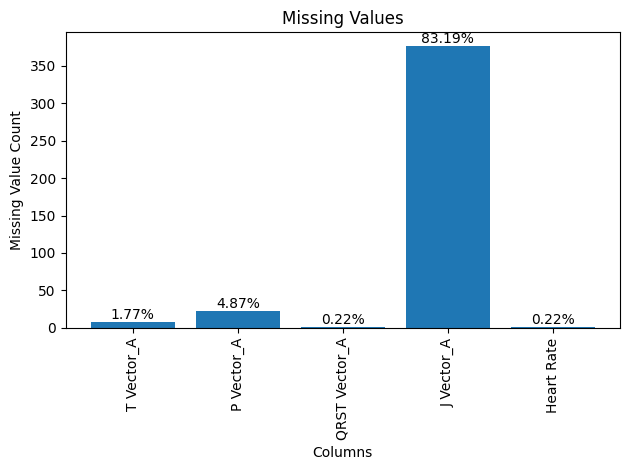

In [ ]:
# function untuk check missing values
def check_missing_values(df):
    missing_values = {}
    total_rows = len(df)

    for column in df.columns:
        missing_count = df[column].isna().sum()
        if missing_count > 0:
            missing_values[column] = missing_count

    # Jika tidak ada missing values pada datagram frame akan keluar dari function
    if len(missing_values) == 0:
        print(f'Tidak ada missing values pada Data Frame ini')
        return

    for column, count in missing_values.items():
        percentage = (count / total_rows) * 100
        print(f"Column '{column}': {count} missing value(s) ({percentage:.2f}%)")

    # buat bar chart
    if len(missing_values) > 0:
        # buat list columns, count missing value(s), dan persen
        columns = list(missing_values.keys())
        counts = list(missing_values.values())
        percentages = [(count / total_rows) * 100 for count in counts]

        # Plot missing value(s) menggunakan bar chart
        fig, ax = plt.subplots()
        ax.bar(columns, counts)

        # tambah label persen
        for i, count in enumerate(counts):
            ax.text(i, count, f"{percentages[i]:.2f}%", ha='center', va='bottom')

        # Set labels dan titles
        ax.set_xlabel('Columns')
        ax.set_ylabel('Missing Value Count')
        ax.set_title('Missing Values')
        ax.set_xticklabels(columns, rotation=90)

        plt.tight_layout()
        plt.show()

# panggil procedure
check_missing_values(dataf)

Dataframe dengan missing value yang lebih dari 80% akan di drop dimana hanya column 'J Vector_A' dengan 376 missing values akan di drop. Untuk column lain dengan data frame yang ada missing value(s) akan diisi dengan nilai mean berdasarkan columnnya.

In [ ]:
# Drop column 'J Vector_A'
dataf = dataf.drop('J Vector_A', axis=1)
dataf

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
# isi sisa missing values yang ada di dataframe dengan mean values tiap column
mean_values = dataf.mean()
dataf = dataf.fillna(mean_values)
dataf

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
# Cek ulang missing values
check_missing_values(dataf)

Tidak ada missing values pada Data Frame ini


## **Handle Data bernilai nol**




In [ ]:
# function hapus column yang data bernilai nol lebih dari threshold
def drop_columns_with_zeros(data, threshold):
    total_rows = len(data)
    zero_values = data[data == 0].count()
    zero_percentages = zero_values / total_rows * 100

    columns_to_drop = zero_percentages[zero_percentages > threshold].index
    data = data.drop(columns_to_drop, axis=1)

    dropped_columns = pd.DataFrame({'Column': columns_to_drop, 'Zero Percentage': zero_percentages[columns_to_drop]})

    print("Dropped Columns:\n")
    print(f"Columns\t\tZero Percantage")
    for _, row in dropped_columns.iterrows():
        print(f"{row['Column']}\t{row['Zero Percentage']:.2f}%")

    return data

In [ ]:
# function hapus rows yang data bernilai nol lebih dari threshold
def drop_rows_with_zeros(data, threshold):
    total_columns = len(data.columns)
    zero_counts = (data == 0).sum(axis=1)
    zero_percentages = zero_counts / total_columns * 100

    rows_to_drop = zero_percentages[zero_percentages > threshold].index
    dropped_rows = data.loc[rows_to_drop]
    data = data.drop(rows_to_drop)

    print("Dropped Rows:\n")
    print(f"Index\t\tZero Percentage")
    for idx, row in dropped_rows.iterrows():
        print(f"{idx}\t\t{zero_percentages.loc[idx]:.2f}%")

    return data

In [ ]:
# set dulu supaya column sex tidak dihapus (karena dijelaskan di 'arrhythmia.names' bahwa sex 0 = male dan 1 = female, jdi tidak boleh dihapus)
dataf['Sex'] = dataf['Sex'].replace(0, 2)

In [ ]:
# panggil function hapus column dengan threshold 50%
dataf = drop_columns_with_zeros(dataf, 50)

Dropped Columns:

Columns		Zero Percantage
Q Wave_W_DI	73.89%
R` Wave_W_DI	99.12%
S` Wave_W_DI	100.00%
R_R Wave DI	99.78%
D_D_R Wave DI	98.89%
R_P Wave DI	98.89%
D_D_P Wave DI	99.56%
R_T Wave DI	99.56%
D_D_T Wave DI	99.12%
Q Wave_W_DII	76.77%
R` Wave_W_DII	97.79%
S` Wave_W_DII	99.56%
R_R Wave DII	98.23%
D_D_R Wave DII	97.12%
R_P Wave DII	99.78%
D_D_P Wave DII	99.56%
R_T Wave DII	99.56%
D_D_T Wave DII	98.45%
Q Wave_W_DIII	55.97%
S Wave_W_DIII	52.88%
R` Wave_W_DIII	92.48%
S` Wave_W_DIII	98.89%
R_R Wave DIII	99.78%
D_D_R Wave DIII	96.46%
R_P Wave DIII	99.78%
D_D_P Wave DIII	98.23%
R_T Wave DIII	98.89%
D_D_T Wave DIII	99.56%
S Wave_W_AVR	83.63%
R` Wave_W_AVR	91.81%
S` Wave_W_AVR	99.78%
R_R Wave AVR	98.89%
D_D_R Wave AVR	99.56%
R_P Wave AVR	99.56%
D_D_P Wave AVR	99.56%
R_T Wave AVR	99.56%
D_D_T Wave AVR	99.12%
Q Wave_W_AVL	66.37%
S Wave_W_AVL	51.11%
R` Wave_W_AVL	97.57%
S` Wave_W_AVL	100.00%
R_R Wave AVL	100.00%
D_D_R Wave AVL	98.23%
R_P Wave AVL	99.78%
D_D_P Wave AVL	99.78%
R_T Wave AVL	99

148 dari 279 column dihapus karena memiliki lebih dari 50% data yang bernilai nol.

In [ ]:
# panggil function hapus baris dengan threshold 30%
dataf = drop_rows_with_zeros(dataf, 30)

Dropped Rows:

Index		Zero Percentage
76		33.59%


1 dari 452 column dihapus karena memiliki lebih dari 30% data yang bernilai nol.

In [ ]:
# set balik column sex
dataf['Sex'] = dataf['Sex'].replace(2, 0)

In [ ]:
# cek hasil data frame setelah data processing
dataf

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,QRSA V5,QRSTA V5,JJ Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,25.5,62.9,-0.3,9.0,-0.9,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,21.6,43.4,-0.5,8.5,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,11.5,48.2,0.9,9.5,-2.4,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,36.8,68.0,0.1,12.2,-2.2,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,21.7,48.9,-0.4,13.1,-3.6,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,-8.4,-0.6,0.0,4.3,-5.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,50.7,82.5,-0.5,15.6,-1.6,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,-39.6,-63.6,1.2,16.3,-28.6,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,29.7,61.0,0.2,12.0,-0.7,0.5,2.4,25.0,46.6,1


# **Output data setelah preprocessing**

In [ ]:
# output informasi dataf termasuk jumlah baris dan kolom, tipe data kolom
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 451
Columns: 131 entries, Age to Class
dtypes: float64(86), int64(45)
memory usage: 465.1 KB


In [ ]:
# output informasi statisk dataf termasuk count, mean, std, min, quartil, dan max
dataf.describe()

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,QRSA V5,QRSTA V5,JJ Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,46.474501,0.552106,166.164080,68.161863,88.909091,155.133038,367.066519,169.975610,90.024390,33.494457,...,17.954545,32.912195,-0.305987,9.068071,-1.460532,0.514634,1.229933,19.387361,29.624169,3.882483
std,16.484771,0.497830,37.208119,16.608243,15.379588,44.890138,33.286634,35.668185,25.851831,45.315652,...,16.282365,24.433385,0.599470,3.450398,2.003473,0.347893,1.418470,13.455905,18.233619,4.411795
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-56.800000,-63.600000,-5.600000,0.000000,-28.600000,-0.800000,-6.000000,-44.200000,-33.200000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.500000,...,8.750000,15.750000,-0.500000,6.600000,-2.100000,0.400000,0.500000,11.500000,17.650000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,18.400000,30.400000,-0.200000,8.800000,-1.100000,0.500000,1.400000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,383.500000,179.000000,102.000000,66.000000,...,27.900000,48.100000,0.000000,11.200000,0.000000,0.700000,2.100000,25.850000,41.150000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,82.100000,127.900000,2.700000,23.600000,0.000000,2.400000,6.000000,88.800000,115.900000,16.000000


# **Setting Variable**

In [ ]:
# membuat variable untuk store semua column , dan store semua column kecuali class
Cdataf = dataf.drop('Class', axis=1)
columnss = list(Cdataf.columns.values)

ccolumns = list(dataf.columns.values)

In [ ]:
# Set yang class = 1 untuk normal dan class[2..16] untuk sakit
dataf['Class'] = dataf['Class'].apply(lambda x: 0 if x != 1 else x)

# **Metode Naive Bayes**

In [ ]:
# Mencari normalisasi data dengan min-max normalization
def normalizationMinMax(Data, columnTarget):
    for column in columnTarget:
        min_val = Data[column].min()
        max_val = Data[column].max()

        if min_val != max_val:
            Data[column] = (Data[column] - min_val) / (max_val - min_val)

    return Data

In [ ]:
# panggil function normalizationMinMax
normalizationData = dataf.copy()
normDataf = normalizationMinMax(normalizationData, columnss)
print(normDataf)

          Age  Sex    Height    Weight  QRS Duration  P-R Interval  \
0    0.903614  0.0  0.125926  0.435294      0.270677      0.368321   
1    0.674699  1.0  0.088889  0.341176      0.195489      0.332061   
2    0.650602  0.0  0.099259  0.523529      0.624060      0.311069   
3    0.662651  0.0  0.103704  0.517647      0.338346      0.385496   
4    0.903614  0.0  0.125926  0.435294      0.248120      0.345420   
..        ...  ...       ...       ...           ...           ...   
447  0.638554  1.0  0.081481  0.376471      0.187970      0.379771   
448  0.445783  0.0  0.125926  0.464706      0.338346      0.261450   
449  0.433735  0.0  0.090370  0.364706      0.398496      0.335878   
450  0.385542  1.0  0.074074  0.288235      0.285714      0.202290   
451  0.939759  1.0  0.081481  0.376471      0.180451      0.242366   

     Q-T Interval  T Interval  P Interval  QRS Vector_A  ...   QRSA V5  \
0        0.501805    0.241758    0.590244      0.457478  ...  0.592513   
1        0.

In [ ]:
# Mencari standardization data
def standardization(Data, columnTarget):
  for column in columnTarget:
        min_val = Data[column].min()
        max_val = Data[column].max()

        if min_val != max_val:
            Data[column] = (Data[column]-Data[column].mean())/(Data[column].std())
  return Data

In [ ]:
# panggil function standardization
standardizedData = dataf.copy()
stdDataf = standardization(standardizedData, columnss)
print(stdDataf)

          Age       Sex    Height    Weight  QRS Duration  P-R Interval  \
0    1.730415 -1.109027  0.640611  0.712787      0.135954      0.843547   
1    0.577836  0.899692 -0.031286 -0.250590     -0.514259      0.420292   
2    0.456512 -1.109027  0.156845  1.615953      3.191952      0.175249   
3    0.517174 -1.109027  0.237473  1.555742      0.721145      1.044037   
4    1.730415 -1.109027  0.640611  0.712787     -0.059110      0.576228   
..        ...       ...       ...       ...           ...           ...   
447  0.395850  0.899692 -0.165665  0.110676     -0.579280      0.977207   
448 -0.574743 -1.109027  0.640611  1.013842      0.721145     -0.403943   
449 -0.635405 -1.109027 -0.004410 -0.009746      1.241315      0.464845   
450 -0.878053  0.899692 -0.300044 -0.792490      0.265996     -1.094517   
451  1.912401  0.899692 -0.165665  0.110676     -0.644301     -0.626709   

     Q-T Interval  T Interval  P Interval  QRS Vector_A  ...   QRSA V5  \
0        0.118170    0.11

In [ ]:
# split data menjadi class normal dan class sick
def separate_by_class(dataf):
    separated = {}
    separated['normal'] = dataf[dataf['Class'] == 1]
    separated['sick'] = dataf[dataf['Class'] != 1]

    return separated

# panggil fungsi
separated_data = separate_by_class(dataf)

# Print isi class normal dan class sick
class_normal = separated_data['normal']
class_sick = separated_data['sick']
print("Class Normal: ")
print(class_normal)
print(f"\nClass Sick:")
print(class_sick)

Class Normal: 
     Age  Sex  Height  Weight  QRS Duration  P-R Interval  Q-T Interval  \
3     55    0     175      94           100           202           380   
6     40    1     160      52            77           129           377   
7     49    1     162      54            78             0           376   
8     44    0     168      56            84           118           354   
11    45    1     165      86            77           143           373   
..   ...  ...     ...     ...           ...           ...           ...   
445   45    0     175      75            91           134           376   
446   20    1     157      57            81           151           363   
447   53    1     160      70            80           199           382   
450   32    1     155      55            93           106           386   
451   78    1     160      70            79           127           364   

     T Interval  P Interval  QRS Vector_A  ...  QRSA V5  QRSTA V5  \
3           179

In [ ]:
# mencari mean setiap column
def calculate_column_means(class_normal, class_sick, columnTarget):
  normalMean = {}
  sickMean = {}
  for column in columnTarget:
    normalMean[column] = class_normal[column].mean()
    sickMean[column] = class_sick[column].mean()
  return normalMean, sickMean

# print mean setiap column untuk class normal dan class sick
df_normalMean, df_sickMean = calculate_column_means(class_normal, class_sick, ccolumns)
print(f'Mean Result\nClass Normal : {df_normalMean}\nClass Sick : {df_sickMean}')

Mean Result
Class Normal : {'Age': 46.2734693877551, 'Sex': 0.6530612244897959, 'Height': 164.10204081632654, 'Weight': 68.66938775510204, 'QRS Duration': 84.27755102040817, 'P-R Interval': 157.21632653061224, 'Q-T Interval': 367.2, 'T Interval': 162.91836734693877, 'P Interval': 92.2326530612245, 'QRS Vector_A': 36.78775510204082, 'T Vector_A': 36.41286082000367, 'P Vector_A': 49.29177028951115, 'QRST Vector_A': 37.566188515317435, 'Heart Rate': 73.2, 'R Wave_W_DI': 50.987755102040815, 'S Wave_W_DI': 17.991836734693877, 'Intrinsic_Deflect_DI': 29.09387755102041, 'R Wave_W_DII': 54.12244897959184, 'S Wave_W_DII': 16.946938775510205, 'Intrinsic_Deflect_DII': 30.693877551020407, 'R Wave_W_DIII': 40.50612244897959, 'Intrinsic_Deflect_DIII': 28.86530612244898, 'Q Wave_W_AVR': 46.53061224489796, 'R Wave_W_AVR': 16.35918367346939, 'Intrinsic_Deflect_AVR': 28.63673469387755, 'R Wave_W_AVL': 41.20816326530612, 'Intrinsic_Deflect_AVL': 24.620408163265306, 'R Wave_W_AVF': 50.906122448979595, 'S 

In [ ]:
# mencari std setiap column
def calculate_column_std(class_normal, class_sick, columnTarget):
  normalStd = {}
  sickStd = {}
  for column in columnTarget:
    normalStd[column] = class_normal[column].std()
    sickStd[column] = class_sick[column].std()
  return normalStd, sickStd

# print std setiap column untuk class normal dan class sick
df_normalStd, df_sickStd = calculate_column_std(class_normal, class_sick, ccolumns)
print(f'STDs Result\nClass Normal : {df_normalStd}\nClass Sick : {df_sickStd}')

STDs Result
Class Normal : {'Age': 14.556092402453762, 'Sex': 0.47697047749324467, 'Height': 8.048125985816393, 'Weight': 14.454595447180552, 'QRS Duration': 8.735439062649531, 'P-R Interval': 44.745158850412835, 'Q-T Interval': 26.458845246973247, 'T Interval': 24.3265327172787, 'P Interval': 23.39554206305599, 'QRS Vector_A': 36.108724892779065, 'T Vector_A': 38.77273323257669, 'P Vector_A': 26.7179551893526, 'QRST Vector_A': 26.876656718946784, 'Heart Rate': 9.159604830763044, 'R Wave_W_DI': 14.101064264175317, 'S Wave_W_DI': 17.8614870594034, 'Intrinsic_Deflect_DI': 7.702150225729104, 'R Wave_W_DII': 15.306744271968066, 'S Wave_W_DII': 18.035064912834958, 'Intrinsic_Deflect_DII': 7.966641726272174, 'R Wave_W_DIII': 22.36372582674446, 'Intrinsic_Deflect_DIII': 17.1005410591759, 'Q Wave_W_AVR': 22.1158481496351, 'R Wave_W_AVR': 15.47928174255208, 'Intrinsic_Deflect_AVR': 26.926483808282224, 'R Wave_W_AVL': 20.411582985482415, 'Intrinsic_Deflect_AVL': 13.4483983382969, 'R Wave_W_AVF':

In [ ]:
# function untuk cari Gaussian Probability Density
def calc_probability(mean, std, x):
  std +=1
  exponent = math.exp(-((x-mean)**2/(2*std**2)))
  return (1/(math.sqrt(2*math.pi)*std))*exponent

In [ ]:
# procedure untuk menghitung evaluasi dan melakukan visualisasi dari hasil prediksi
def confussionMatrix(result):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    x = True

    for i in result:
        # cek dulu apakah ada Ground truth bernilai ('?'), akan break jika ada
        if i['Ground Truth'] == '?':
            x = False
            break
        # jika prediksi dan ground truth sama dengan prediction result, maka TP akan bertambah satu
        elif i['Prediction Result'] == 1 and i['Prediction Result'] == i['Ground Truth']:
            TP += 1
        # jika prediksi dan ground truth sama dengan prediction result, maka TN akan bertambah satu
        elif i['Prediction Result'] == 0 and i['Prediction Result'] == i['Ground Truth']:
            TN += 1
        # jika prediksi bernilai 1 tetapi ground truth berbeda dengan prediction result, maka FP akan bertambah satu
        elif i['Prediction Result'] == 1 and i['Prediction Result'] != i['Ground Truth']:
            FP += 1
        # jika prediksi bernilai 0 tetapi ground truth berbeda dengan prediction result, maka FN akan bertambah satu
        elif i['Prediction Result'] == 0 and i['Prediction Result'] != i['Ground Truth']:
            FN += 1

    # jika x bernilai true akan output TP, TN, FP, FN, akurasi, presisi, dan recall, beserta visualisasi
    if x:
        akurasi = ((TP+TN)/(TP+TN+FP+FN))*100
        presisi = ((TP)/(TP+FP))*100
        recall = ((TP)/(TP+FN))*100

        print(f"\nTP : {TP}  FN : {FP}\nTN : {TN}  FN : {FN}")
        print(f"Accuracy : {akurasi}%")
        print(f"Precission : {presisi}%")
        print(f"Recall : {recall}%")

        # visualisasi confusion matrix
        labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
        values = [TN, FP, FN, TP]

        plt.bar(labels, values)
        plt.title('Confusion Matrix')
        plt.xlabel('Prediction')
        plt.ylabel('Count')
        plt.text(3.8, 0, f"Accuracy : {akurasi}%\nPrecission : {presisi}%\nRecall : {recall}%")
        plt.show()

    # jika x bernilai false akan output tidak bisa proses confusion matrix
    else:
        print("\nCannot process the confusion matrix")

In [ ]:
# fungsi untuk melakukan prediksi kelas berdasarkan model yang telah ditraining
def doPrediction(normalMean, normalStd, sickMean, sickStd, target, columnTarget, truthColumn):
  result = []
  # iterate sebanyak jumlah baris target
  for i in range(len(target)):

    # setiap iterasi akan set normalResult dan sickResult menjadi 1 untuk hasil perhitungan probabilitas masing-masing kelas.
    normalResult = 1
    sickResult = 1

    # iterate sebanyak jumlah kolom columnTarget
    for column in columnTarget:

      # untuk setiap kolom akan dikali normal result dengan hasil calc_probability normal dan dikali juga sick result dengan hasil calc_probability sick
      normalResult *= calc_probability(normalMean[column], normalStd[column], target[column].iloc[i])
      sickResult *= calc_probability(sickMean[column], sickStd[column], target[column].iloc[i])

    # hasilnya akan dimasukkan ke result
    result.append({'ID' : i, 'Normal Probability' : "{}".format(normalResult), 'Sick Probability' : "{}".format(sickResult),
                        'Prediction Result' : int(normalResult > sickResult),
                       'Ground Truth' : target[truthColumn].iloc[i]})
  return result

In [ ]:
# fungsi untuk membagi dataset menjadi fold untuk train data
def folding(dataset, trainingPercentage, location, shuffle:bool):
    # menghitung panjang training berdasarkan persentase training yang diberikan
    lengthTraining = int(len(dataset)*trainingPercentage/100)

    # jika shuffle itu true maka akan di shuffle dulu datasetnya
    if(shuffle):
        dataset = dataset.sample(frac=1).reset_index(drop=True)

    # inisiasi variable subset train dan validation sebagai list kosong
    train = []
    validation = []

    # jika location left, train berisi awal hingga lengthTraining lalu validation dari lengthTraing sampai habis
    if(location == 'left'):
        train, validation = dataset.iloc[:lengthTraining].reset_index(drop=True), dataset.iloc[lengthTraining:].reset_index(drop=True)

    # jika location right, train berisi awal hingga panjang yang dihitung berdasarkan perbedaan antara lengthTraining dan panjang dataset lalu validation dari panjang tersebut sampai habis
    elif(location == 'right'):
        validation,train = dataset.iloc[:abs(lengthTraining-len(dataset))].reset_index(drop=True), dataset.iloc[abs(lengthTraining-len(dataset)):].reset_index(drop=True)

    # jika location middle, train berisi data tengah dikurangi setengah perbedaan panjang lalu validation berisi gabungan data sebelum dan setelah setengah perbedaan panjang dataset
    elif(location == 'middle'):
        train = dataset.iloc[int(abs(lengthTraining-len(dataset))/2):len(dataset)-int(abs(lengthTraining-len(dataset))/2)]
        validation = pd.concat([dataset.iloc[:int(abs(lengthTraining-len(dataset))/2)],dataset.iloc[len(dataset)-int(abs(lengthTraining-len(dataset))/2):]])
    return train, validation

In [ ]:
# panggil fungsi folding
trainData, validationData = folding(dataf.copy(), 70, 'left',shuffle=True)

In [ ]:
# output isi trainData
trainData

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,QRSA V5,QRSTA V5,JJ Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,36,1,149,48,88,170,389,144,106,70,...,20.5,12.1,-1.0,9.3,0.0,0.6,-0.9,21.0,16.5,0
1,31,1,150,64,82,195,362,156,102,61,...,31.2,50.8,0.2,11.8,0.0,0.6,2.3,44.8,63.6,1
2,34,1,165,60,74,178,302,127,117,112,...,-2.2,10.2,-0.6,4.1,-2.9,1.5,0.8,1.9,8.1,0
3,20,0,178,65,88,155,360,163,71,-22,...,11.2,1.1,-0.2,10.2,0.0,0.5,0.4,24.0,25.4,1
4,16,1,160,60,76,524,329,141,205,81,...,50.7,75.3,-0.8,16.4,0.0,-0.7,1.9,42.6,59.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,77,0,165,77,98,0,359,149,0,79,...,17.7,21.4,-0.9,10.6,-3.8,0.3,0.3,17.7,19.9,0
311,35,1,160,51,78,147,324,155,75,40,...,15.2,38.0,-0.4,9.5,-2.4,0.7,2.4,12.0,33.1,0
312,44,1,160,88,77,158,399,163,94,46,...,29.3,46.4,0.1,12.4,0.0,0.3,1.7,39.2,54.1,1
313,64,1,160,80,62,160,376,136,104,4,...,19.0,29.3,0.0,5.5,0.0,0.4,1.1,19.8,27.2,1


In [ ]:
# output isi validationData
validationData

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,QRSA V5,QRSTA V5,JJ Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,66,1,155,62,80,188,418,178,104,19,...,15.0,42.5,-0.3,13.9,-1.2,0.3,0.8,30.7,37.4,1
1,22,1,163,50,74,133,370,163,71,66,...,23.1,48.5,-0.1,8.6,-0.6,0.4,2.2,18.1,35.2,1
2,71,1,165,82,82,182,369,152,107,33,...,-1.6,8.6,0.0,6.2,-3.5,0.6,1.3,2.6,11.4,1
3,35,1,160,53,55,163,340,162,102,40,...,24.6,59.6,0.0,8.7,-0.5,0.5,2.3,20.9,40.6,1
4,34,1,167,60,63,164,396,139,84,49,...,30.9,46.8,-0.1,8.7,0.0,0.4,1.5,22.6,33.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,18,0,175,60,102,135,379,167,73,91,...,23.1,39.9,-0.3,11.8,-2.0,0.6,1.4,17.1,29.7,0
132,37,0,168,82,85,197,379,182,117,60,...,27.4,49.0,0.2,9.8,-1.4,0.6,1.6,23.8,40.1,1
133,58,1,160,62,98,158,358,154,114,85,...,15.9,22.3,0.1,9.1,-2.6,0.7,0.8,17.9,24.3,0
134,53,1,156,65,73,160,359,248,37,33,...,23.2,26.1,-0.4,8.1,0.0,0.1,-0.8,22.6,10.8,0


In [ ]:
# train data di split berdasarkan class
separate_traindata = separate_by_class(dataf)

# print isi train_class_normal dan train_class_sick
train_class_normal = separate_traindata['normal']
train_class_sick = separate_traindata['sick']
print("Class Normal: ")
print(train_class_normal)
print(f"\nClass Sick:")
print(train_class_sick)

Class Normal: 
     Age  Sex  Height  Weight  QRS Duration  P-R Interval  Q-T Interval  \
3     55    0     175      94           100           202           380   
6     40    1     160      52            77           129           377   
7     49    1     162      54            78             0           376   
8     44    0     168      56            84           118           354   
11    45    1     165      86            77           143           373   
..   ...  ...     ...     ...           ...           ...           ...   
445   45    0     175      75            91           134           376   
446   20    1     157      57            81           151           363   
447   53    1     160      70            80           199           382   
450   32    1     155      55            93           106           386   
451   78    1     160      70            79           127           364   

     T Interval  P Interval  QRS Vector_A  ...  QRSA V5  QRSTA V5  \
3           179

In [ ]:
# calculate mean setiap column untuk train_class_normal dan train_class_sick lalu di print
train_normalMean, train_sickMean = calculate_column_means(train_class_normal, train_class_sick, ccolumns)
print(f'Mean Result\nClass Normal : {train_normalMean}\nClass Sick : {train_sickMean}')

Mean Result
Class Normal : {'Age': 46.2734693877551, 'Sex': 0.6530612244897959, 'Height': 164.10204081632654, 'Weight': 68.66938775510204, 'QRS Duration': 84.27755102040817, 'P-R Interval': 157.21632653061224, 'Q-T Interval': 367.2, 'T Interval': 162.91836734693877, 'P Interval': 92.2326530612245, 'QRS Vector_A': 36.78775510204082, 'T Vector_A': 36.41286082000367, 'P Vector_A': 49.29177028951115, 'QRST Vector_A': 37.566188515317435, 'Heart Rate': 73.2, 'R Wave_W_DI': 50.987755102040815, 'S Wave_W_DI': 17.991836734693877, 'Intrinsic_Deflect_DI': 29.09387755102041, 'R Wave_W_DII': 54.12244897959184, 'S Wave_W_DII': 16.946938775510205, 'Intrinsic_Deflect_DII': 30.693877551020407, 'R Wave_W_DIII': 40.50612244897959, 'Intrinsic_Deflect_DIII': 28.86530612244898, 'Q Wave_W_AVR': 46.53061224489796, 'R Wave_W_AVR': 16.35918367346939, 'Intrinsic_Deflect_AVR': 28.63673469387755, 'R Wave_W_AVL': 41.20816326530612, 'Intrinsic_Deflect_AVL': 24.620408163265306, 'R Wave_W_AVF': 50.906122448979595, 'S 

In [ ]:
# calculate std setiap column untuk train_class_normal dan train_class_sick lalu di print
train_normalStd, train_sickStd = calculate_column_std(train_class_normal, train_class_sick, ccolumns)
print(f'STDs Result\nClass Normal : {train_normalStd}\nClass Sick : {train_sickStd}')

STDs Result
Class Normal : {'Age': 14.556092402453762, 'Sex': 0.47697047749324467, 'Height': 8.048125985816393, 'Weight': 14.454595447180552, 'QRS Duration': 8.735439062649531, 'P-R Interval': 44.745158850412835, 'Q-T Interval': 26.458845246973247, 'T Interval': 24.3265327172787, 'P Interval': 23.39554206305599, 'QRS Vector_A': 36.108724892779065, 'T Vector_A': 38.77273323257669, 'P Vector_A': 26.7179551893526, 'QRST Vector_A': 26.876656718946784, 'Heart Rate': 9.159604830763044, 'R Wave_W_DI': 14.101064264175317, 'S Wave_W_DI': 17.8614870594034, 'Intrinsic_Deflect_DI': 7.702150225729104, 'R Wave_W_DII': 15.306744271968066, 'S Wave_W_DII': 18.035064912834958, 'Intrinsic_Deflect_DII': 7.966641726272174, 'R Wave_W_DIII': 22.36372582674446, 'Intrinsic_Deflect_DIII': 17.1005410591759, 'Q Wave_W_AVR': 22.1158481496351, 'R Wave_W_AVR': 15.47928174255208, 'Intrinsic_Deflect_AVR': 26.926483808282224, 'R Wave_W_AVL': 20.411582985482415, 'Intrinsic_Deflect_AVL': 13.4483983382969, 'R Wave_W_AVF':

{'ID': 0, 'Normal Probability': '6.818619996405809e-173', 'Sick Probability': '2.806284719953231e-186', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 1, 'Normal Probability': '4.2849482060211556e-170', 'Sick Probability': '5.456658332545718e-186', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 2, 'Normal Probability': '3.0172041418247395e-169', 'Sick Probability': '1.2053496108379425e-181', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 3, 'Normal Probability': '1.4994146024813158e-167', 'Sick Probability': '1.5305609232486303e-183', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 4, 'Normal Probability': '1.084611717232808e-187', 'Sick Probability': '5.631270051462053e-189', 'Prediction Result': 1, 'Ground Truth': 0}
{'ID': 5, 'Normal Probability': '1.3511471082470922e-195', 'Sick Probability': '2.335824682069875e-195', 'Prediction Result': 0, 'Ground Truth': 0}
{'ID': 6, 'Normal Probability': '1.5721266144073605e-171', 'Sick Probability': '2.0453954690309175e-183', 'Predi

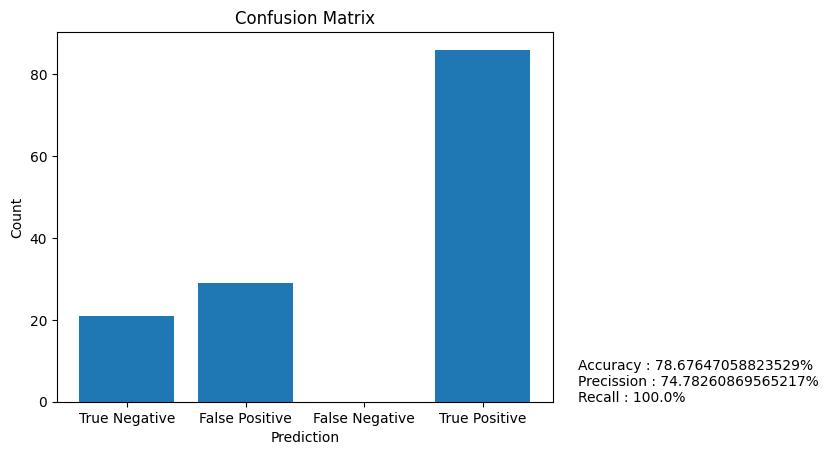

In [ ]:
# result
# panggil function doPrediction
result = []

target = validationData # your ground truth data
result = doPrediction(train_normalMean, train_normalStd, train_sickMean, train_sickStd, target, ccolumns, truthColumn='Class')

# Print prediksi dan panggil procedure confussionMatrix
for p in result:
    print(p)
confussionMatrix(result)